CONNECT WITH ME

[![Email](https://img.shields.io/badge/Gmail-Contact-red)](mailto:samihaazeemi550@gmail.com)&nbsp;&nbsp;
[![LinkedIn](https://img.shields.io/badge/LinkedIn-Connect-blue)](http://www.linkedin.com/in/samiha-azeem-2a7553219/)&nbsp;&nbsp;
[![GitHub](https://img.shields.io/badge/GitHub-Follow-lightgrey)](https://github.com/SamihaAzeem?tab=repositories)&nbsp;

Real-Time T-Shirt Color Detection Using YOLOv8

Project Description:

This project aims to develop a real-time T-shirt color detection system using the YOLOv8 (You Only Look Once, version 8) object detection model. The system will capture frames from a webcam feed, process them using the YOLOv8 model, and identify the color of T-shirts worn by individuals in the frame. The detected colors will be displayed with bounding boxes around the T-shirts in real-time.


Objectives:

Real-Time Webcam Feed: Capture video from the webcam and analyze each frame to detect T-shirt colors instantly.

YOLOv8 Model: Use the YOLOv8 model for fast and accurate object detection.

Color Detection: Identify and classify T-shirt colors into categories like black, blue, grey, and white.

Bounding Box Visualization: Draw boxes around detected T-shirts with labels showing the color and confidence level.

Expected Outcome:

By the end of this project, we will have a working system that can:

Capture live video from a webcam.
Detect T-shirts in the video feed.
Classify the detected T-shirts into specific color categories.
Show the results with bounding boxes and labels for each detected color.
This project will highlight how advanced computer vision techniques and deep learning models like YOLOv8 can be used for real-time object detection and classification.

Install the required library

In [ ]:
# !pip install ultralytics

Training the Yolo v8 model on custom dataset

In [ ]:
from ultralytics import YOLO

model = YOLO('yolov8n.yaml')
model.train(data='/content/drive/MyDrive/yolo_dataset_tshirt/data.yaml', epochs=50, imgsz=640)


Save the model

In [ ]:
model.save('/content/drive/MyDrive/yolov8_tshirt.pt')

Detect a Single image

results[0] -- Accesses the first result in the list which contains the detections for the first image or frame
In the ultralytics library, the results object typically contains a list of results for each image or frame processed. 
When we perform inference on a single frame, we usually get a list with one result in it.
Even if we're only processing one image or frame, the output format is designed to handle multiple images, 
so accessing results[0] is a consistent way to get the results, whether it's a single image or a batch of images.

In [ ]:
model = YOLO('tshirt_detection_model.pt')

image_path = 'C:/Users/DELL/Desktop/Bootcamp/ML1-Bootcamp/Tshirt/YOLO trained model/Archive/a.jpg'  
results = model(image_path)
results[0].show()



Use the trained model to detect color of tshirts
Test images are on the folder named Archive

In [ ]:
import os
import matplotlib.pyplot as plt

model = YOLO('tshirt_detection_model.pt')

dir_path = 'C:/Users/DELL/Desktop/Bootcamp/ML1-Bootcamp/Tshirt/YOLO trained model/Archive'
save_dir = 'C:/Users/DELL/Desktop/Bootcamp/ML1-Bootcamp/Tshirt/YOLO trained model/annotated_images'

os.makedirs(save_dir, exist_ok=True)
image_files = [f for f in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, f)) and f.lower().endswith(('.png', '.jpg', '.jpeg'))]

for image_file in image_files:
    image_path = os.path.join(dir_path, image_file)
    results = model(image_path)
    
    # Display the results for the first (and only) image in results
    # results[0].show()
    
    # Save the annotated image in the folder
    save_path = os.path.join(save_dir, image_file)
    results[0].save(save_path)

    # Can use matplotlib too
    # result = results[0]
    # img_with_boxes = plot_boxes(result.imgs[0], result.boxes.xyxy, result.boxes.conf, result.boxes.cls, class_names=model.names)
    # plt.imshow(img_with_boxes)
    # plt.axis('off')
    # plt.show()


Real time webcamp detection

In [ ]:
import cv2

model = YOLO('tshirt_detection_model.pt')
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not open webcam.")
    exit()

while True:
    ret, frame = cap.read()
    if not ret:
        print("Error: Could not read frame.")
        break
    

    frame = cv2.flip(frame, 1) #flips the camera horizontaly
    results = model(frame)
    annotated_frame = results[0].plot()

    cv2.imshow('T-shirt Color Detection', annotated_frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


Real time Color detection using DroidCam(phone camera)

In [ ]:
import cv2
from ultralytics import YOLO


model = YOLO('tshirt_detection_model.pt')
phone_camera_url = 'http://192.168.1.41:4747/video' #replace with your IP address

cap = cv2.VideoCapture(phone_camera_url)

if not cap.isOpened():
    print("Error: Could not open phone camera.")
    exit()

while True:
    ret, frame = cap.read()
    if not ret:
        print("Error: Could not read frame.")
        break

    frame = cv2.flip(frame, 1)
    results = model(frame)
    annotated_frame = results[0].plot()
    cv2.imshow('T-shirt Color Detection', annotated_frame)

    if cv2.waitKey(1) & 0xFF == ord('q'): # press q to quit
        break
cap.release()
cv2.destroyAllWindows()


Output: Test Image Color detection:

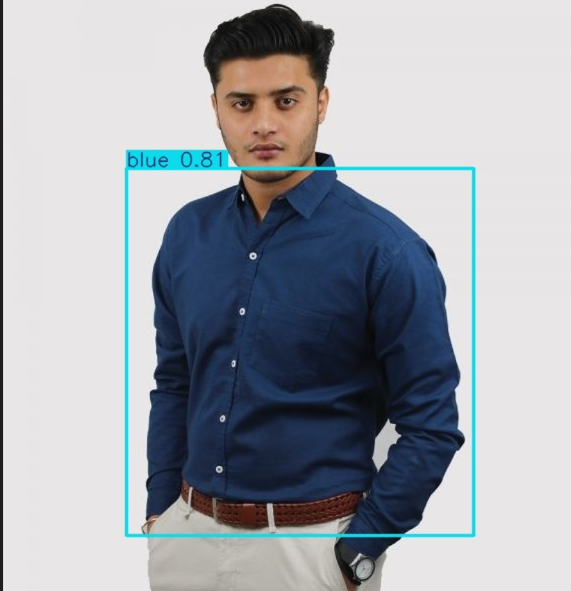

Github Repo Link: https://github.com/SamihaAzeem/ML1-Bootcamp/tree/494b6a8005faba2305b41002072dca11d2dc96b4/YOLO%20trained%20model

Happy Coding :)